In [1]:
import DualNetM as dm
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["figure.figsize"] = [6, 4.5]

In [3]:
prior_network = dm.datasets.load_human_prior_network()

In [4]:
adata=sc.read_csv('/home/dbj/cancer/top3000expressT.csv')
Prior_marker=pd.read_csv('/home/dbj/cancer/marker333.csv')
output_file='/home/dbj/DualNetM-main/cancer/'

In [5]:
data = dm.data_preparation(adata, prior_network)

Data loading and preprocessing....
    74437 extra edges (Spearman correlation > 0) are added into the prior network.
    Total number of edges: 151828.
 n_genes x n_cells =2813 x 4645


In [6]:
DualNetM_GRN_model = dm.NetModel(epochs=340, cuda='0', seed=10)
DualNetM_GRN_model.run(data)

  Iter: 1/1: 100%|███████████████| 340/340 [00:23<00:00, 14.66it/s, loss=0.00485, min_loss=0.000851]


In [7]:
DualNetM_GRN_model.get_network(output_file=output_file)

In [8]:
DualNetMResult=DualNetM_GRN_model.get_DualNetM_results(Prior_marker=Prior_marker)

In [9]:
coexpress,result=DualNetMResult.find_marker(output_file=output_file)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1500x500 with 0 Axes>

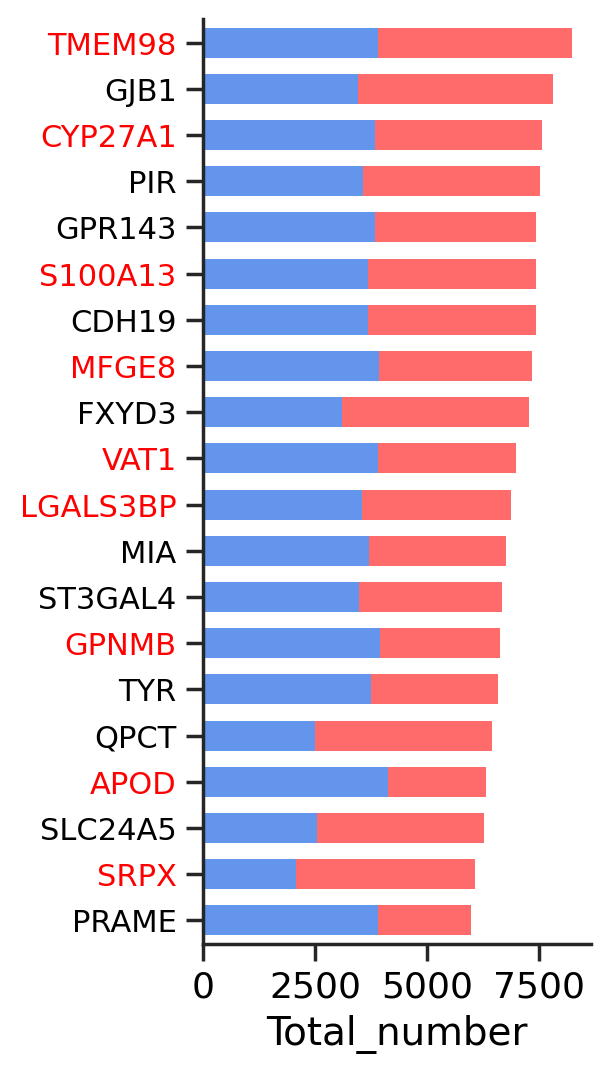

In [10]:
DualNetMResult.plot_candidate_marker('melanoma',topK=20)

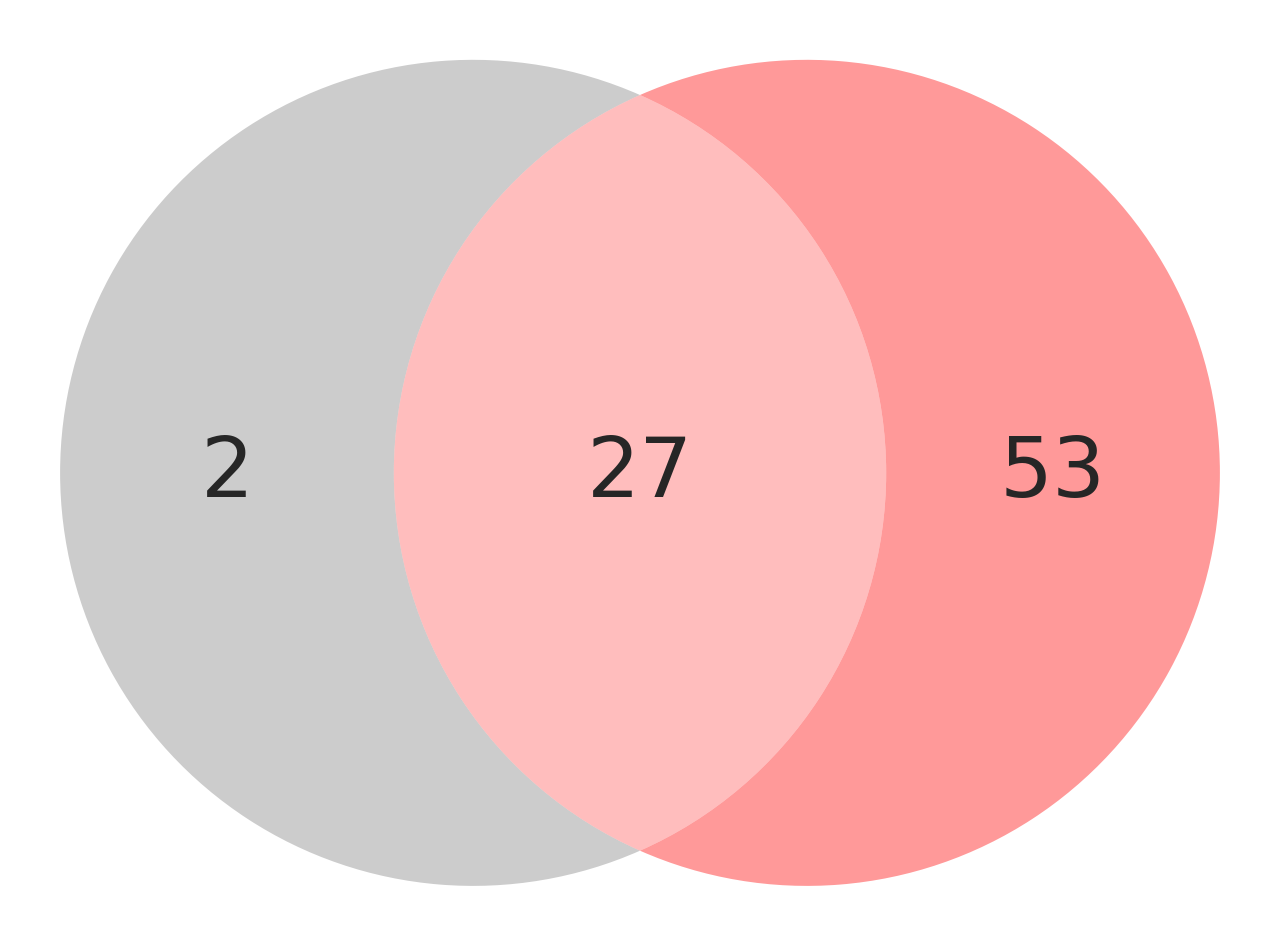

In [11]:
DualNetMResult.plot_Prior_Candidate_Venn('melanoma')